In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [5]:
train_dataset = torchvision.datasets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw

Processing...
Done!


In [6]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [7]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [8]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [12]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [13]:
test_dataset = torchvision.datasets.MNIST(root='.', train=False, transform=transforms.ToTensor(), download=True)

In [14]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [17]:
# Build the MODEL
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)
# No need for final softmax!

In [19]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [20]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [21]:
# Data loader
# Useful because it automatically generates batches in the training loop and takes care of shuffling
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
# Check out what the data loader does
# maps the values to (0, 1)
# makes the data of shape (batch_size, color, height, width)
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)

In [24]:
for x, y in tmp_loader:
    print(x)
    print('\n')
    print(y)
    print(x.shape)
    print(y.shape)
    break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [25]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [26]:
# Train the MODEL
n_epochs = 10
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for i in range(n_epochs):
    train_loss = []
    for inputs, targets in train_loader:
        # move data to GPU
        inputs, targets = inputs.to(device), targets.to(device)
        
        # reshape the input
        inputs = inputs.view(-1, 784)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        train_loss.append(loss.item())
        
    # Get train loss and test loss
    train_loss = np.mean(train_loss)
    
    test_loss = []
    for inputs, targets in test_loader:
        # move data to GPU
        inputs, targets = inputs.to(device), targets.to(device)
        
        # reshape the input
        inputs = inputs.view(-1, 784)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)
    
    # Save losses
    train_losses[i] = train_loss
    test_losses[i] = test_loss
    
    print(f'Epoch {i+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1/10, Train Loss: 0.4109, Test Loss: 0.2140
Epoch 2/10, Train Loss: 0.1900, Test Loss: 0.1545
Epoch 3/10, Train Loss: 0.1384, Test Loss: 0.1240
Epoch 4/10, Train Loss: 0.1070, Test Loss: 0.1053
Epoch 5/10, Train Loss: 0.0867, Test Loss: 0.0933
Epoch 6/10, Train Loss: 0.0729, Test Loss: 0.0847
Epoch 7/10, Train Loss: 0.0611, Test Loss: 0.0887
Epoch 8/10, Train Loss: 0.0526, Test Loss: 0.0749
Epoch 9/10, Train Loss: 0.0444, Test Loss: 0.0857
Epoch 10/10, Train Loss: 0.0381, Test Loss: 0.0770


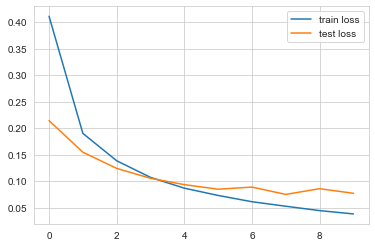

In [27]:
# Plotting
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

In [31]:
# calculating the ACCURACY
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    # get predictions
    _, predictions = torch.max(outputs, 1)
    
    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct / n_total

In [32]:
# calculating the ACCURACY
n_correct1 = 0.
n_total1 = 0.
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    # get predictions
    _, predictions = torch.max(outputs, 1)
    
    # update counts
    n_correct1 += (predictions == targets).sum().item()
    n_total1 += targets.shape[0]
test_acc = n_correct1 / n_total1

In [33]:
print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

Train Accuracy: 0.9926, Test Accuracy: 0.9771


In [38]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix !')
    else:
        print('Confusion Matrix Without Normalization !')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if  cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    # It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

Confusion Matrix Without Normalization !
[[ 970    0    2    2    1    1    1    1    2    0]
 [   0 1123    4    0    0    0    2    0    6    0]
 [   5    3  996    9    2    0    2    6    8    1]
 [   0    0    1  994    0    3    0    5    3    4]
 [   1    0    5    1  965    0    0    1    1    8]
 [   3    1    0   10    1  863    2    1    8    3]
 [   6    3    0    1    3    4  937    0    4    0]
 [   2    5    8    6    1    0    0  994    4    8]
 [   5    1    3    7    4    3    2    2  944    3]
 [   1    3    0    5    8    2    0    2    3  985]]


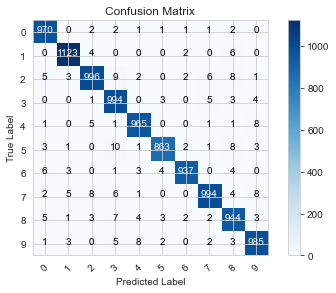

In [39]:
# Get all prediction in numpy array and plot confusion matrix
X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
    inputs = inputs.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))
    
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True Label: 8, Predicted: 3')

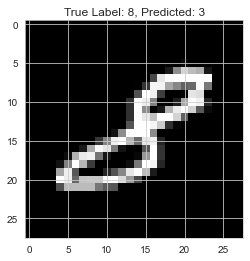

In [42]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'True Label: {y_test[i]}, Predicted: {int(p_test[i])}')